In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.8/38.8 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 376.9/376.9 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 127.7/127.7 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 710.0 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 26.4/26.4 MB 707.5 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 5.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 5.5/5.5 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.6 MB/s eta 0:00:00
  Using

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\deepr\AppData\Local\Temp\pip-install-muoy63iq\tensorflow-gpu_5a264693baae4fc5aaf46dc2f890fca8\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 181 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

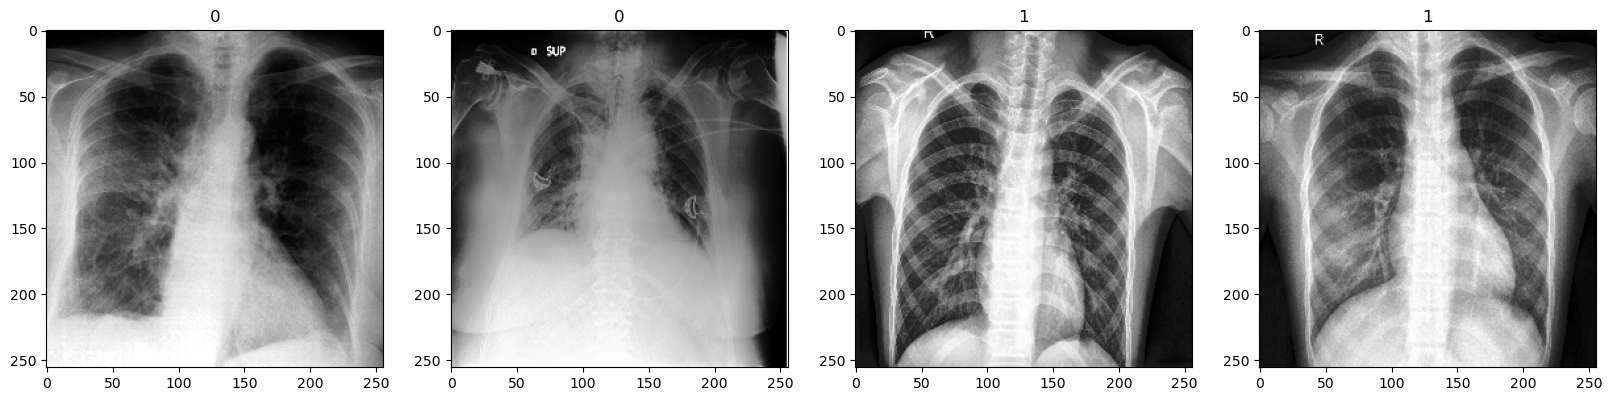

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098]],
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098]],
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.02352941],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098],
          [0.02745098, 0.02745098, 0.02745098]],
 
         ...,
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.02352

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

4

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\deepr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.5198 - loss: 0.7432 - val_accuracy: 0.7188 - val_loss: 0.5482
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.7354 - loss: 0.5981 - val_accuracy: 0.9688 - val_loss: 0.4004
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.9625 - loss: 0.3462 - val_accuracy: 0.9375 - val_loss: 0.2093
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.9688 - loss: 0.1464 - val_accuracy: 1.0000 - val_loss: 0.0671
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.9688 - loss: 0.0800 - val_accuracy: 0.9688 - val_loss: 0.0653
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.9635 - loss: 0.0474 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.9833 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 0.0635
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.9677 - loss: 0.0840 - val_accuracy: 0.9688 - val_loss:

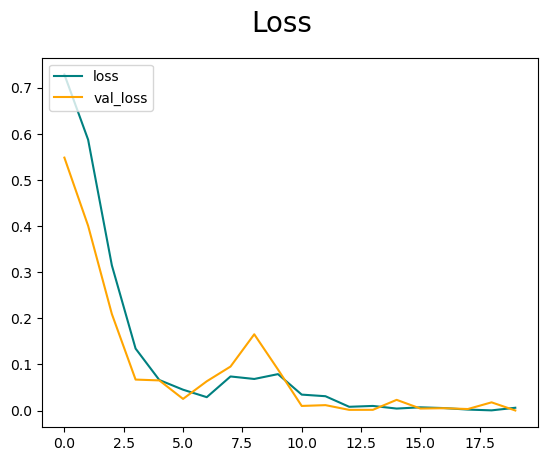

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

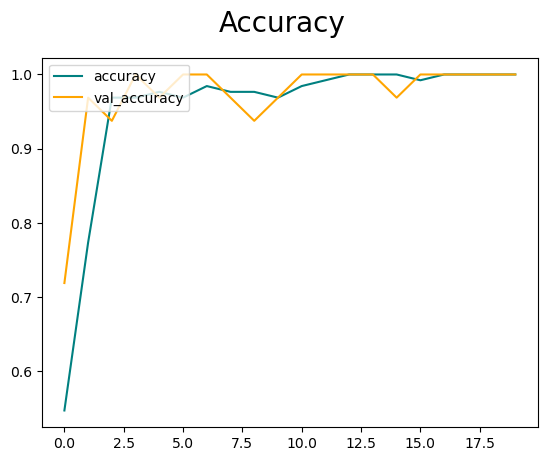

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [68]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [36]:
import cv2

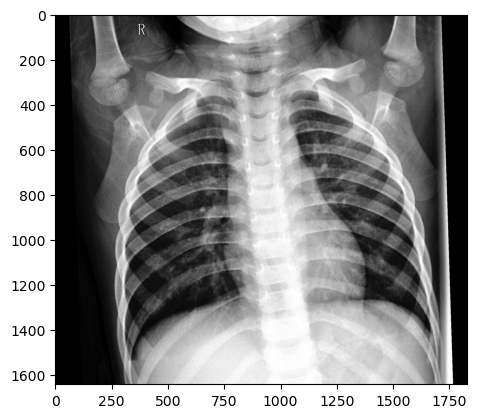

In [54]:
img = cv2.imread('0115.jpeg')
plt.imshow(img)
plt.show()

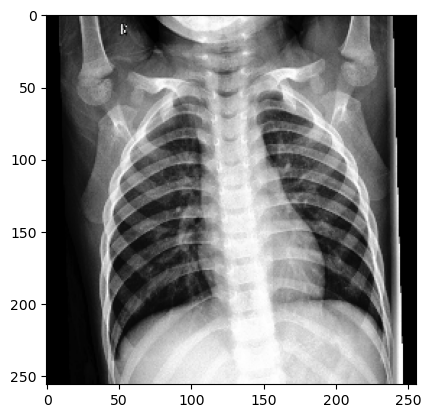

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [57]:
yhat

array([[0.9999974]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Covid')

Predicted class is Normal


In [59]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','imageclassifier.keras'))

In [65]:
new_model = load_model('models/imageclassifier.keras')

c:\Users\deepr\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [69]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.9999974]], dtype=float32)

In [75]:
data = tf.keras.utils.image_dataset_from_directory('test_data')

Found 46 files belonging to 2 classes.


In [78]:
for batch in data.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [79]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.95, shape=(), dtype=float32) tf.Tensor(0.9782609, shape=(), dtype=float32)
